In [2]:
from Allroute import *
from matplotlib import pyplot as plt
from matplotlib import animation
from datetime import datetime, timedelta
plt.rcParams['animation.ffmpeg_path'] = r'C:\ffmpeg\bin\ffmpeg.exe'
%matplotlib inline

  # Location @ NorthAtlantic, sailing from Rotterdam to New York  [Winter]
  


**<font color = blue>1. Bathymetry Info </font>**

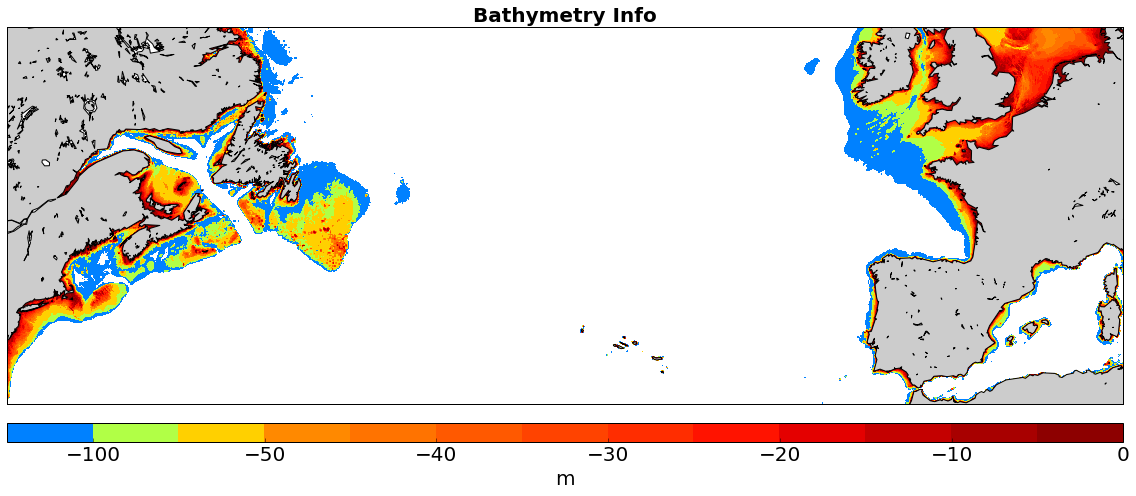

In [30]:
m = Basemap(
  projection="merc",
  resolution='l',
  area_thresh=0.1,
  llcrnrlon=-75,
  llcrnrlat=35,
  urcrnrlon=10,
  urcrnrlat=55
)
plt.figure(figsize=(20, 15))
plt.title('Bathymetry Info', fontsize=20, fontweight='bold')
lon, lat = np.meshgrid(bathymetry.longi[:], bathymetry.lati[:])
x, y = m(lon, lat)
clevs = [-200,-100,-75,-50,-45,-40,-35,-30,-25,-20,-15,-10,-5,0]
cs = m.contourf(x, y, bathymetry.elevation[:], clevs,cmap=plt.cm.jet)
cbar = m.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('m', fontsize = 20)
cbar.ax.tick_params(labelsize=20) 
m.drawcoastlines()
m.fillcontinents()
#plt.show()
plt.savefig('bath.png')

**<font color = blue>2. Algorithm </font>**

- _isochrone_

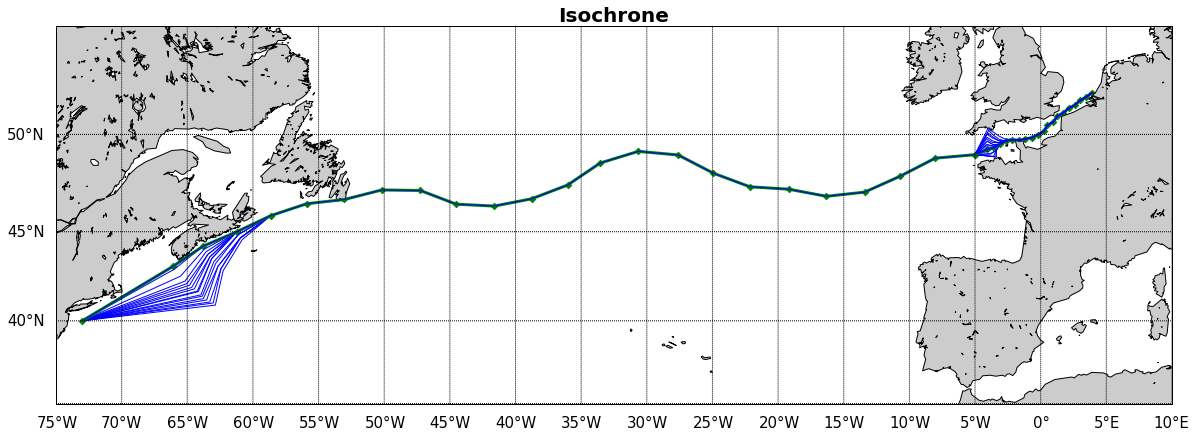

In [4]:
# departure
p_dep = np.array([3.9, 52.0])
# destination
p_des = np.array([-5.0, 49.0])
# construct route 1
iso_set1 = isochrone(p_dep, p_des, 1, 30, 20, 1, 1, 30, 0, 0)
iso_path1 = construct_isopath(iso_set1)
ind1 = int(np.argwhere(iso_path1[:,-1,3] == min(iso_path1[:,-1,3])).ravel())
# lowest fuel consumption
tran_fuelc = iso_path1[ind1][-1, 3]
tran_timec = iso_path1[ind1][-1, 0]
# departure
p_dep = np.array([-5.0, 49.0])
# destination
p_des = np.array([-73.0, 40.0])
# construct route 2
iso_set2 = isochrone(p_dep, p_des, 1, 20, 20, 6, 2, 20, tran_timec, tran_fuelc)
iso_path2 = construct_isopath(iso_set2)
ind2 = int(np.argwhere(iso_path2[:,-1,3] == min(iso_path2[:,-1,3])).ravel())


# drawing
plt.figure(figsize=(20, 15))
plt.title('Isochrone', fontsize=20, fontweight='bold')
for num, ip in enumerate(iso_path1):
    longi = ip[:, 1]
    lati = ip[:, 2]
    x, y = m(longi, lati)
    if num == ind1:
        m.plot(x, y, marker=None, linewidth=3, color='g')
        m.scatter(x, y, marker='D',color='g')
    m.plot(x, y, marker=None, color='b')
for num, ip in enumerate(iso_path2):
    longi = ip[:, 1]
    lati = ip[:, 2]
    x, y = m(longi, lati)
    if num == ind2:
        m.plot(x, y, marker=None, linewidth=3, color='g')
        m.scatter(x, y, marker='D',color='g')
    m.plot(x, y, marker=None, color='b')

m.drawparallels(np.arange(-90.,120.,5.), labels=[1,0,0,0], fontsize=15)
m.drawmeridians(np.arange(-180.,180.,5.), labels=[0,0,0,1], fontsize=15)
m.drawcoastlines()
m.fillcontinents()
plt.show()

- _Dynamic Programming_

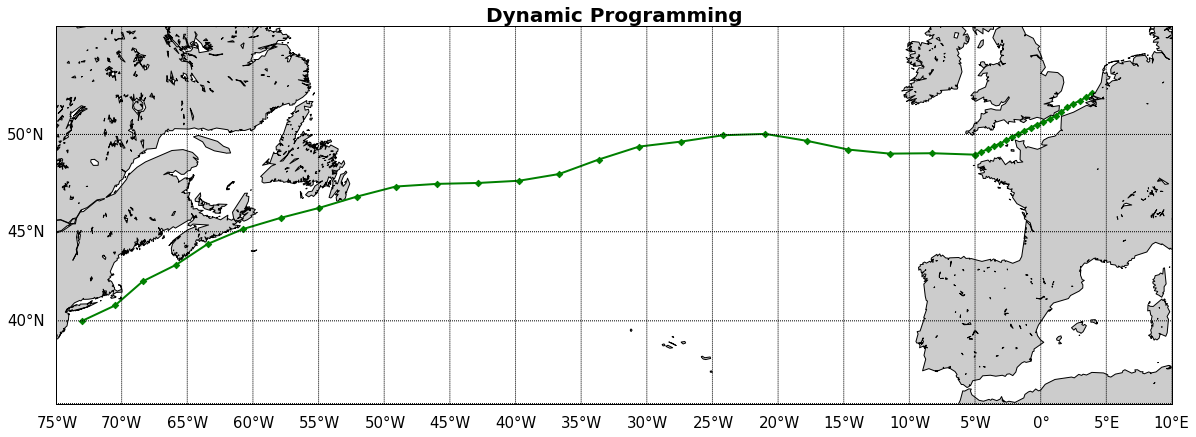

In [5]:
# departure
p_dep = np.array([3.9, 52.0])
# destination
p_des = np.array([-5.0, 49.0])
# # construct route 1
dy2_set1 = TwoDDP(p_dep, p_des, 20, 1, 31, 0.08, 3, 0, 0)
dy2_path1 = construct_dypath2(dy2_set1)
dy2timec = dy2_path1[-1,0]
dy2fuelc = dy2_path1[-1,3]
# departure
p_dep = np.array([-5.0, 49.0])
# destination
p_des = np.array([-73.0, 40.0])
# construct route 2
dy2_set2 = TwoDDP(p_dep, p_des, 20, 6, 31, 0.1, 3, dy2timec, dy2fuelc)
dy2_path2 = construct_dypath2(dy2_set2)


plt.figure(figsize=(20, 15))
plt.title('Dynamic Programming', fontsize=20, fontweight='bold')
x, y = m(dy2_path1[:,1], dy2_path1[:,2])
m.plot(x, y, marker=None, linewidth=2, color='g')
m.scatter(x, y, marker='D',color='g')

x, y = m(dy2_path2[:,1], dy2_path2[:,2])
m.plot(x, y, marker=None, linewidth=2, color='g')
m.scatter(x, y, marker='D',color='g')
m.drawparallels(np.arange(-90.,120.,5.), labels=[1,0,0,0], fontsize=15)
m.drawmeridians(np.arange(-180.,180.,5.), labels=[0,0,0,1], fontsize=15)
m.drawcoastlines()
m.fillcontinents()
plt.show()

- _3 Dimensional Dynamic Programming_

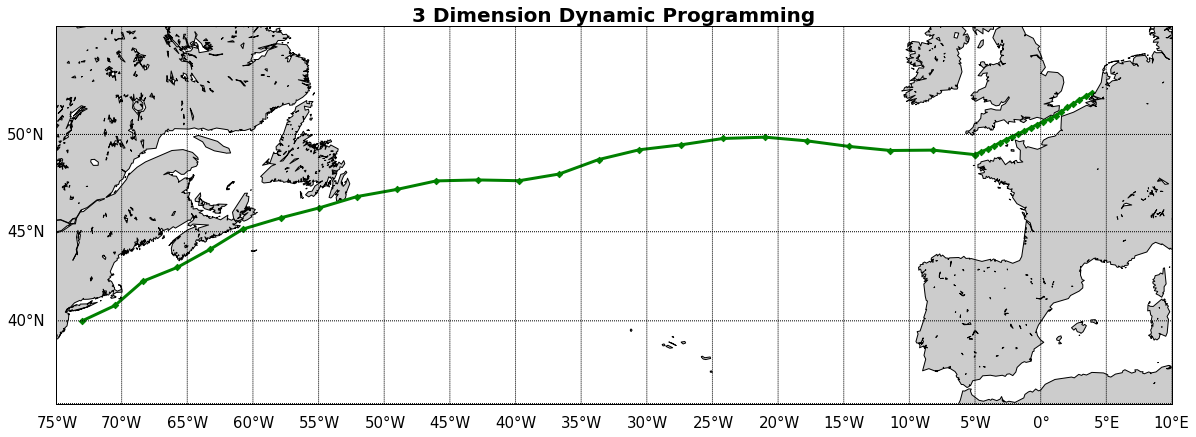

In [6]:
# departure
p_dep = np.array([3.9, 52.0])
# destination
p_des = np.array([-5.0, 49.0])
# # construct route 1
dy3_set1 = ThreeDDP(p_dep, p_des, 20, 1, 31, 0.08, 3, 0, 0)
dy3_path1 = construct_dypath3(dy3_set1)
dy3timec = dy3_path1[-1,0]
dy3fuelc = dy3_path1[-1,3]
# departure
p_dep = np.array([-5.0, 49.0])
# destination
p_des = np.array([-73.0, 40.0])
# construct route 2
dy3_set2 = ThreeDDP(p_dep, p_des, 20, 6, 31, 0.1, 3, dy3timec, dy3fuelc)
dy3_path2 = construct_dypath3(dy3_set2)

plt.figure(figsize=(20, 15))
plt.title('3 Dimension Dynamic Programming', fontsize=20, fontweight='bold')
x, y = m(dy3_path1[:,1], dy3_path1[:,2])
m.plot(x, y, marker=None, linewidth=3, color='g')
m.scatter(x, y, marker='D',color='g')

x, y = m(dy3_path2[:,1], dy3_path2[:,2])
m.plot(x, y, marker=None, linewidth=3, color='g')
m.scatter(x, y, marker='D',color='g')
m.drawparallels(np.arange(-90.,120.,5.), labels=[1,0,0,0], fontsize=15)
m.drawmeridians(np.arange(-180.,180.,5.), labels=[0,0,0,1], fontsize=15)
m.drawcoastlines()
m.fillcontinents()
plt.show()

- _Djikstra's Algorithm_

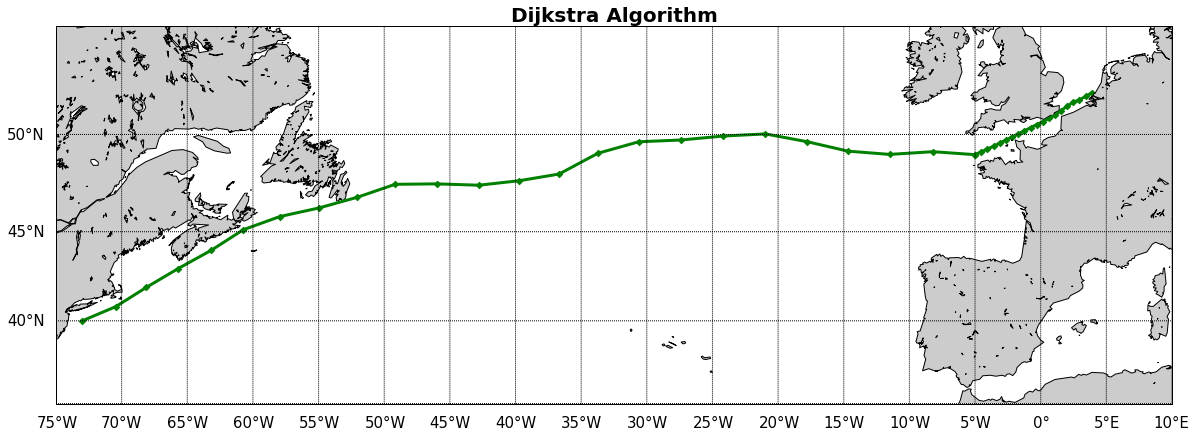

In [7]:
# departure
p_dep = np.array([3.9, 52.0])
# destination
p_des = np.array([-5.0, 49.0])
# # construct route 1
DijkGraph1 = gen_graph(p_dep, p_des, 20, 1, 25, 0.07)
GraphWidth = len(DijkGraph1)
GraphHeight = max([len(dijkgraph) for dijkgraph in DijkGraph1])
DijkGrid1 = DijkstraGrid(GraphWidth, GraphHeight)
Dcf1, Dcsf1 = dijkstra(DijkGrid1, DijkGraph1, (0, 0), (GraphWidth - 1, 0), 20, 5, 0, 0)
Dij_path1 = construct_dijpath((GraphWidth - 1, 0),(0, 0), Dcf1, Dcsf1, DijkGraph1)
dij_timec = Dij_path1[-1,0]
dij_fuelc = Dij_path1[-1,3]
# departure
p_dep = np.array([-5.0, 49.0])
# destination
p_des = np.array([-73.0, 40.0])
# construct route 2
DijkGraph2 = gen_graph(p_dep, p_des, 20, 6, 25, 0.1)
GraphWidth = len(DijkGraph2)
GraphHeight = max([len(dijkgraph) for dijkgraph in DijkGraph2])
DijkGrid2 = DijkstraGrid(GraphWidth, GraphHeight)
Dcf2, Dcsf2 = dijkstra(DijkGrid2, DijkGraph2, (0, 0), (GraphWidth - 1, 0), 20, 5, dij_timec, dij_fuelc)
Dij_path2 = construct_dijpath((GraphWidth - 1, 0),(0, 0), Dcf2, Dcsf2, DijkGraph2)

plt.figure(figsize=(20, 15))
plt.title('Dijkstra Algorithm', fontsize=20, fontweight='bold')
x, y = m(Dij_path1[:,1], Dij_path1[:,2])
m.plot(x, y, marker=None, linewidth=3, color='g')
m.scatter(x, y, marker='D',color='g')

x, y = m(Dij_path2[:,1], Dij_path2[:,2])
m.plot(x, y, marker=None, linewidth=3, color='g')
m.scatter(x, y, marker='D',color='g')
m.drawparallels(np.arange(-90.,120.,5.), labels=[1,0,0,0], fontsize=15)
m.drawmeridians(np.arange(-180.,180.,5.), labels=[0,0,0,1], fontsize=15)
m.drawcoastlines()
m.fillcontinents()
plt.show()

**<font color = blue>3. Comparative Analysis </font>**

- _Track_

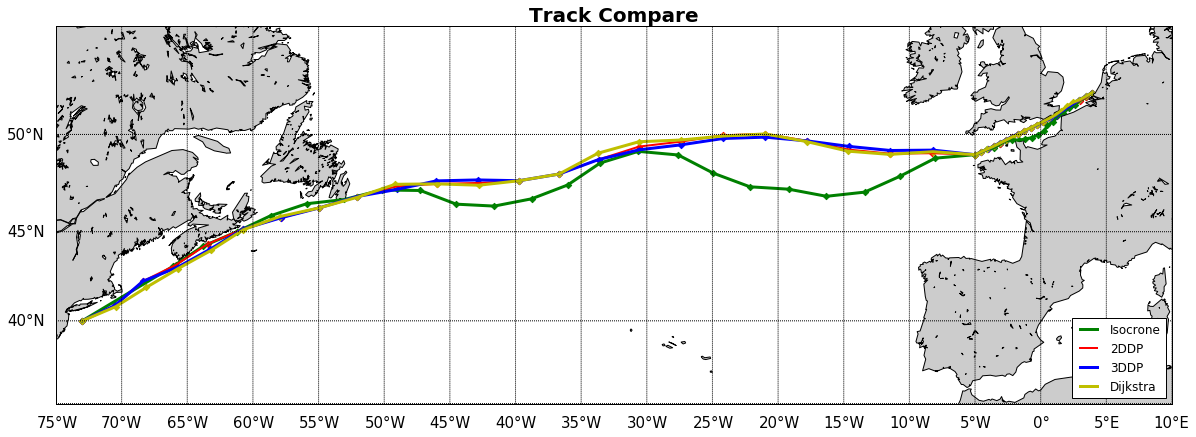

In [8]:
plt.figure(figsize=(20, 15))
plt.title('Track Compare', fontsize=20, fontweight='bold')
# Isochrone
x, y = m(iso_path1[ind1][:, 1], iso_path1[ind1][:, 2])
m.plot(x, y, marker=None, linewidth=3, color='g', label = "Isocrone")
m.scatter(x, y, marker='D',color='g')
x, y = m(iso_path2[ind2][:, 1], iso_path2[ind2][:, 2])
m.plot(x, y, marker=None, linewidth=3, color='g')
m.scatter(x, y, marker='D',color='g')
# 2D
x, y = m(dy2_path1[:,1], dy2_path1[:,2])
m.plot(x, y, marker=None, linewidth=2, color='r', label = "2DDP")
m.scatter(x, y, marker='D',color='r')
x, y = m(dy2_path2[:,1], dy2_path2[:,2])
m.plot(x, y, marker=None, linewidth=2, color='r')
m.scatter(x, y, marker='D',color='r')
# 3D
x, y = m(dy3_path1[:,1], dy3_path1[:,2])
m.plot(x, y, marker=None, linewidth=3, color='b', label = "3DDP")
m.scatter(x, y, marker='D',color='b')
x, y = m(dy3_path2[:,1], dy3_path2[:,2])
m.plot(x, y, marker=None, linewidth=3, color='b')
m.scatter(x, y, marker='D',color='b')
# Dij
x, y = m(Dij_path1[:,1], Dij_path1[:,2])
m.plot(x, y, marker=None, linewidth=3, color='y', label = "Dijkstra")
m.scatter(x, y, marker='D',color='y')
x, y = m(Dij_path2[:,1], Dij_path2[:,2])
m.plot(x, y, marker=None, linewidth=3, color='y')
m.scatter(x, y, marker='D',color='y')
    
m.drawparallels(np.arange(-90.,120.,5.), labels=[1,0,0,0], fontsize=15)
m.drawmeridians(np.arange(-180.,180.,5.), labels=[0,0,0,1], fontsize=15)
m.drawcoastlines()
m.fillcontinents()
plt.legend(loc = 4)
plt.show()

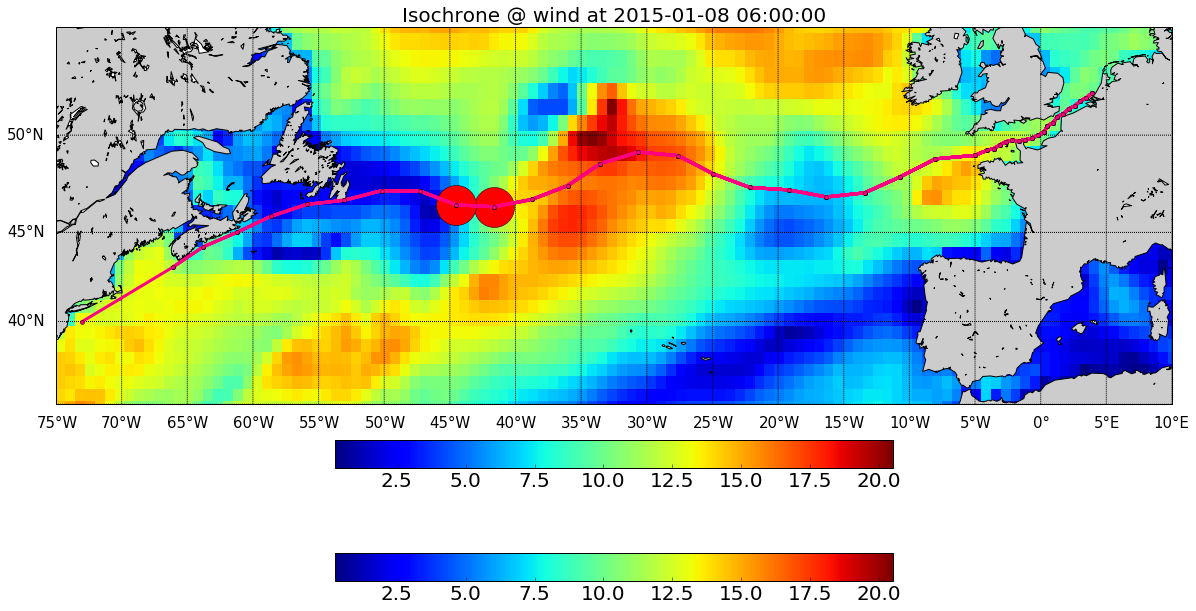

In [29]:
lon, lat = np.meshgrid(weather_info.lon, weather_info.lat)
x, y = m(lon, lat)
iso_int = np.vstack((iso_path1[ind1], iso_path2[ind2][1:]))
dy2_int = np.vstack((dy2_path1, dy2_path2[1:]))
dy3_int = np.vstack((dy3_path1, dy3_path2[1:]))
dij_int = np.vstack((Dij_path1, Dij_path2[1:]))
x1, y1 = m(iso_int[:,1], iso_int[:,2])
#x1, y1 = m(dy3_int[:,1], dy3_int[:,2])
it = iso_int[:, 0]
#it = dy3_int[:, 0]
wt = np.linspace(0, (124 - 1) * 6, 124)
ani_ind = int(np.argwhere(wt > max(it))[0])

fig = plt.figure(figsize=(20, 15))
txt = plt.title('', fontsize = 20)

m.drawcoastlines()
m.fillcontinents()
m.drawparallels(np.arange(-90.,120.,5.), labels=[1,0,0,0], fontsize=15)
m.drawmeridians(np.arange(-180.,180.,5.), labels=[0,0,0,1], fontsize=15)

def init():
    wind = np.sqrt(np.power(weather_info.U[:,:,0],2)+np.power(weather_info.V[:,:,0],2))
    cs = m.pcolormesh(x, y, wind, shading='flat', cmap=plt.cm.jet)
    #cs = m.pcolormesh(x, y, weather_info.Hs[:,:,0], shading='flat', cmap=plt.cm.jet)    
    md = weather_info.Met['Time'][0][0]
    pd = datetime.fromordinal(int(md)) + timedelta(days=md%1) - timedelta(days = 366)
    txt.set_text("Isochrone @ Wind at " + str(pd))
    cb = plt.colorbar(cs, orientation ='horizontal', fraction=0.1,shrink=.5, pad=0.05)
    cb.ax.tick_params(labelsize=20) 
    return [cs]

def animate(i):
    wind = np.sqrt(np.power(weather_info.U[:,:,i],2)+np.power(weather_info.V[:,:,i],2))
    if i == 0:
        cs = m.pcolormesh(x, y, wind, shading='flat', cmap=plt.cm.jet)
        return [cs]
    cs = m.pcolormesh(x, y, wind, shading='flat', cmap=plt.cm.jet)
    index = int(max(np.argwhere(it<wt[i])))
    if iso_int[index, 6] > 6000:
        m.plot(x1[index], y1[index], marker = 'o', markersize = 40, color = 'r')
    m.plot(x1[:index + 1],y1[:index + 1] ,marker='o',markersize = 4, linewidth=3, color='#ff0080')
    md = weather_info.Met['Time'][i][0]
    pd = datetime.fromordinal(int(md)) + timedelta(days=md%1) - timedelta(days = 366)
    txt.set_text("Isochrone @ wind at " + str(pd))
    return [cs]

anim = animation.FuncAnimation(fig, animate, init_func=init, frames= ani_ind+1, blit=True)
mywriter = animation.FFMpegWriter(fps=1)
anim.save('Isochrone_wind.mp4', writer=mywriter)



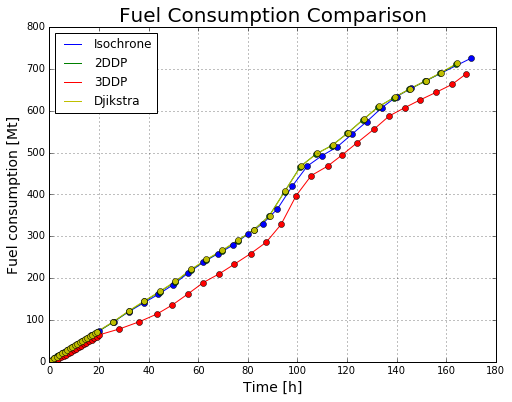

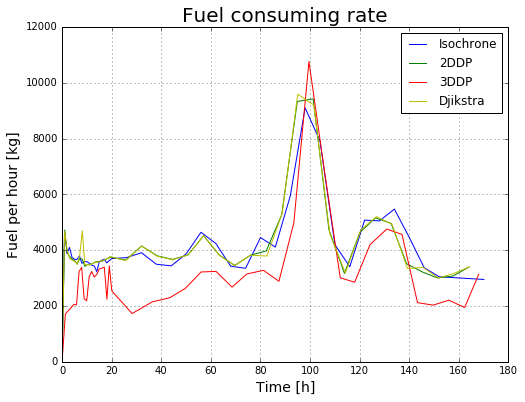

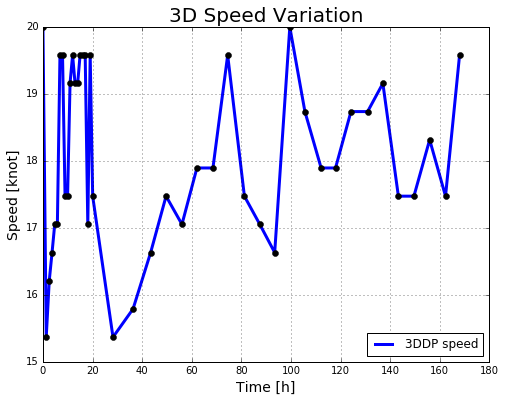

In [23]:
iso_int = np.vstack((iso_path1[ind1], iso_path2[ind2][1:]))
dy2_int = np.vstack((dy2_path1, dy2_path2[1:]))
dy3_int = np.vstack((dy3_path1, dy3_path2[1:]))
dij_int = np.vstack((Dij_path1, Dij_path2[1:]))
fig = plt.figure(figsize=(8, 6))

plt.title("Fuel Consumption Comparison", fontsize = 20)
plt.ylabel("Fuel consumption [Mt]", fontsize = 14)
plt.xlabel("Time [h]", fontsize = 14)
plt.plot(iso_int[:,0],iso_int[:,3]/1000, color = "b", label = "Isochrone")
plt.plot(dy2_int[:,0],dy2_int[:,3]/1000, color = "g", label = "2DDP")
plt.plot(dy3_int[:,0],dy3_int[:,3]/1000, color = "r", label = "3DDP")
plt.plot(dij_int[:,0],dij_int[:,3]/1000, color = "y", label = "Djikstra")
plt.plot(iso_int[:,0],iso_int[:,3]/1000, "bo", color = "b")
plt.plot(dy2_int[:,0],dy2_int[:,3]/1000, "go", color = "g")
plt.plot(dy3_int[:,0],dy3_int[:,3]/1000, "ro", color = "r")
plt.plot(dij_int[:,0],dij_int[:,3]/1000, "yo", color = "y")
plt.grid()
plt.legend(loc = 2)
plt.show()

fig = plt.figure(figsize=(8, 6))
plt.title("Fuel consuming rate", fontsize = 20)
plt.plot(iso_int[:,0],iso_int[:,6], color = "b", label = "Isochrone")
plt.plot(dy2_int[:,0],dy2_int[:,6], color = "g", label = "2DDP")
plt.plot(dy3_int[:,0],dy3_int[:,7], color = "r", label = "3DDP")
plt.plot(dij_int[:,0],dij_int[:,6], color = "y", label = "Djikstra")
plt.xlabel("Time [h]", fontsize = 14)
plt.ylabel("Fuel per hour [kg]", fontsize = 14)
plt.grid()
plt.legend(loc = 1)
plt.show()

fig = plt.figure(figsize=(8, 6))
plt.title("3D Speed Variation", fontsize = 20)
plt.xlabel("Time [h]", fontsize = 14)
plt.ylabel("Speed [knot]", fontsize = 14)
plt.plot(dy3_int[:,0], dy3_int[:,4], linewidth=3,label = "3DDP speed")
plt.plot(dy3_int[:,0], dy3_int[:,4], "ko")
plt.grid()
plt.legend(loc = 4)
plt.show()


In [19]:
dij_int


array([[  0.00000000e+00,   3.90000000e+00,   5.20000000e+01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.01752357e+00,   3.42872711e+00,   5.18257206e+01,
          4.76503250e+03,   1.89268547e+04,   2.15805075e+04,
          4.68297013e+03,   2.34148506e+02],
       [  2.03040594e+00,   2.94830548e+00,   5.16664668e+01,
          8.82551947e+03,   1.63703406e+04,   1.84739335e+04,
          4.00884356e+03,   2.00442178e+02],
       [  3.04328831e+00,   2.44537576e+00,   5.15389475e+01,
          1.25815081e+04,   1.52190605e+04,   1.70885622e+04,
          3.70821800e+03,   1.85410900e+02],
       [  4.06081146e+00,   1.98455214e+00,   5.13589296e+01,
          1.62876031e+04,   1.49606014e+04,   1.67846586e+04,
          3.64227092e+03,   1.82113546e+02],
       [  5.09668900e+00,   1.55372014e+00,   5.11436385e+01,
          2.00162987e+04,   1.47937367e+04,   1.65877996e+04,
          3.59955251e+03,   1.7